# Milestone 2 - Hypothesis Simulation 

## Author - Anjali Aggarwal



## Instructions
Use the <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">automotive data set</a> to perform the following:

1. Identify a likely distribution for price and several other features.
2. Compute basic summary statistics by both classical, bootstrap and Bayesian methods
3. Compute confidence intervals for the above summary statistics by classical, bootstrap and  Bayesian methods
4. Correctly use hypothesis tests to determine if the differences in pairs and multiple populations are significant:
            Classical tests
            Tukey’s Honest Significant Differences (HSD)
            Bootstrap methods
            Bayesian model


In [294]:
# importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from __future__ import division 

import scipy
import scipy.stats
from matplotlib import pyplot
import seaborn

In [295]:
seaborn.set_palette('muted')
seaborn.set_style('ticks')
%matplotlib inline


For this assignment I have selected three features (features different from the Assignment 4) - "number of doors", "number of cylinders" and  "engine-types". Three of them are categorical values. Classical test, Tukey-HSD, bootstrap and bayesain model have been applied on each features separately. 

In [296]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"

In [297]:
# loading the data 
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 
    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values from the price column, accounting for mising values coded as '?'
    cols = ['price']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

In [298]:
auto_price.head()#checkig first five rows of the column

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [299]:
auto_price.describe()#basic statistics for numericals features

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [300]:
auto_price.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

(array([16., 37., 28., 21., 13., 11., 12.,  8., 15., 10.,  5.,  2.,  3.,
         2.,  1.,  1.,  0.,  2.,  0.,  2.,  2.,  2.,  3.,  2.,  0.,  0.,
         2.,  0.,  0.,  1.]),
 array([ 5118.        ,  6460.73333333,  7803.46666667,  9146.2       ,
        10488.93333333, 11831.66666667, 13174.4       , 14517.13333333,
        15859.86666667, 17202.6       , 18545.33333333, 19888.06666667,
        21230.8       , 22573.53333333, 23916.26666667, 25259.        ,
        26601.73333333, 27944.46666667, 29287.2       , 30629.93333333,
        31972.66666667, 33315.4       , 34658.13333333, 36000.86666667,
        37343.6       , 38686.33333333, 40029.06666667, 41371.8       ,
        42714.53333333, 44057.26666667, 45400.        ]),
 <a list of 30 Patch objects>)

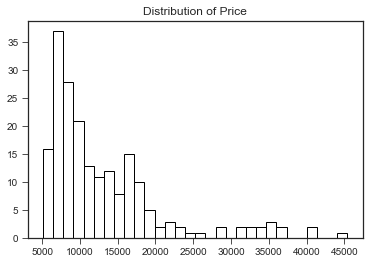

In [301]:
# checking distribution of price
pyplot.title('Distribution of Price')
pyplot.hist((auto_price.loc[:, 'price']), bins=30, color='white', edgecolor='black')

# 1. "num-of-doors" attribute- hypothesis testing by classical, bootstrap and bayesian model

['two' 'four' '?']


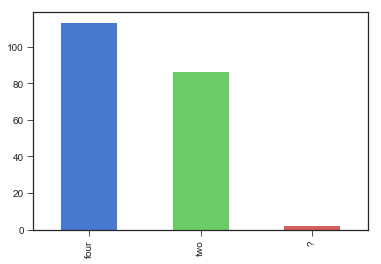

In [302]:
#Checking the unique values 
print(auto_price.loc[:,'num-of-doors'].unique())
#plotting the unique vlaues 
auto_price.loc[:,'num-of-doors'].value_counts().plot(kind='bar')

"number of door" feature has some missing values which I will not take into consideration for the hypothesis testing

### Classical testing - t-test and ANOVA

In [303]:
#Classical testing for "number of doors" attribute
#function for t-test
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
 
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)#Classical testing for "number of doors" attribute
#function for t-test
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)   
 
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

def plot_t(a, b, t_test, cols=['pop_A', 'pop_B'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)    
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)    

DegFreedom     165.655534
Difference    -747.544659
Statistic       -0.653819
PValue           0.513991
Low95CI      -3056.257710
High95CI      1561.168391
dtype: float64


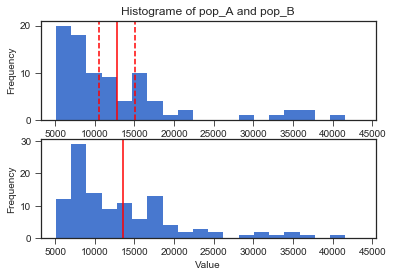

In [304]:
two_doors = auto_price.loc[auto_price.loc[:, 'num-of-doors'] == 'two', 'price']
four_doors = auto_price.loc[auto_price.loc[:, 'num-of-doors'] == 'four', 'price']
test_doors = t_test(two_doors, four_doors, alpha = 0.05)
print(test_doors)
plot_t(two_doors, four_doors, test_doors)

the plot shows almost no difference in the mean of price of two door and four door cars and t-test also confirmed there is no differnece. (Mean line is present with in confidance intervals) Further, checking by ANOVA test

F statistic = 0.427479119155265
P-value = 0.5139909636776467


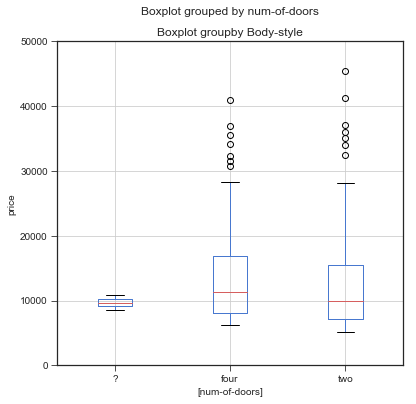

In [305]:
#ANOVA test for "number of doors" column
#plaotting a box plot first
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
auto_price.loc[:,['price', 'num-of-doors']].boxplot(by = 'num-of-doors', ax = ax)
ax.set_title('Boxplot groupby Body-style') # Give the plot a main title
ax.set_ylabel('price')# Set  text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis
f_statistic, p_value = ss.f_oneway(two_doors, four_doors)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F value is very low and p value is high that means difference in means are not significant. Beacuae there is only two categories in the "number of doors", tukey-hsd test will not make any sense to do( there is no multiple categories to compare)

### Bootstrap

In [306]:
#boot strap for 'number of doors' attribute
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    pyplot.hist(x, alpha=.5)
    pyplot.axvline(x.mean())
    # 95% confidence interval 
    lwr_ci = np.percentile(x, p/2.)
    upr_ci = np.percentile(x, 100-p/2.)
    (pyplot.axvline(lwr_ci, color='red', linewidth=3))
    (pyplot.axvline(upr_ci, color='red', linewidth=3))
    print("differnce in mean is %5.2f" % x.mean())
    print("lower confidence intervel is %5.2f " % lwr_ci)
    print("upper confidence intervel is % 5.2f" % upr_ci)
    
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b)
    pyplot.title(b_label)
    
    pyplot.tight_layout()

    

differnce in mean is -765.56
lower confidence intervel is -2900.06 
upper confidence intervel is  1581.49


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

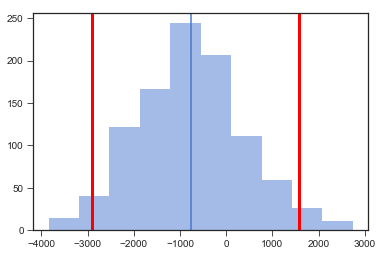

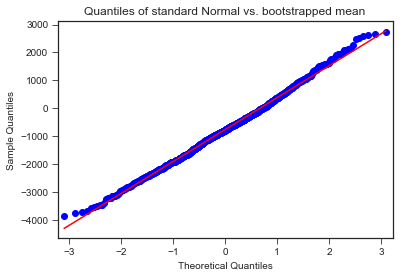

In [307]:
#bootstrap for difference in means of price of two door car and four doors car
two = auto_price[auto_price.loc[:, 'num-of-doors'] == 'two']
four = auto_price[auto_price.loc[:, 'num-of-doors'] == 'four']

n_replicas = 1000
diffs = []
for i in range(n_replicas):
    two_sample_mean = two.sample(frac=1, replace=True).price.mean()
    four_sample_mean = four.sample(frac=1, replace=True).price.mean()
    diffs.append(two_sample_mean - four_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')


From the upper plot, it can be seen that differnce in means of price in two door vs four door car is not signficant because the confidence intervel contain 0. the lower qq plot is shown to confirm that the bootstrap distribution of the difference in means confirm the CLT. Mean, lower and upper confidence intervel are also printed.

### Bayesian model - posterior difference in mean and credible intervel

In [308]:
num_samples = 25
twodoor = auto_price[auto_price.loc[:, 'num-of-doors'] == 'two'].sample(n=num_samples)
fourdoor = auto_price[auto_price.loc[:, 'num-of-doors'] == 'four'].sample(n=num_samples)

In [309]:
#function for the calculation of the positerior distribution of mean
N = 1000
p = np.linspace(4000, 50000, num=N)
def comp_like(p, x): 
    variance = np.std(x)**2 # sigmasqr
    x_mean = np.asarray(x).mean()  # xbar
    print('Mean = %.3f, Standard deviation = %.3f' % (x_mean, np.std(x)))
    n = len(x)
    l = np.exp(-n * np.square(x_mean - p) / (2 * variance))
    return l / l.sum()
def posterior(prior, like):
    post = prior * like # compute the product of the probabilities
    return post / sum(post) # normalize the distribution to sum to unity


Mean = 15061.120, Standard deviation = 9192.064


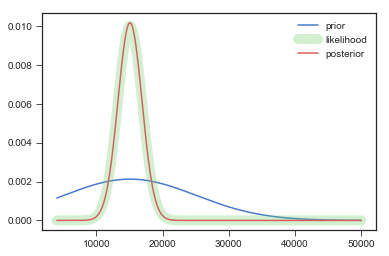

In [310]:
#positerior distribution of mean for four door
pp = scipy.stats.norm.pdf(p, loc=fourdoor.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_fourdoor = comp_like(p, fourdoor.price)
post_fourdoor = posterior(pp, like_fourdoor)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_fourdoor, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_fourdoor, label='posterior')
pyplot.legend()

Mean = 12576.520, Standard deviation = 9626.550


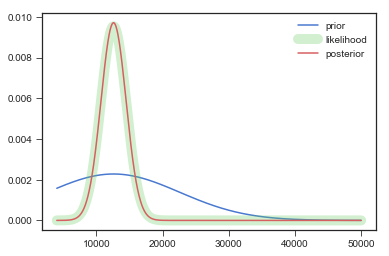

In [311]:
#posterior distribution of mean for two door
pp = scipy.stats.norm.pdf(p, loc=twodoor.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_twodoor = comp_like(p, twodoor.price)
post_twodoor = posterior(pp, like_twodoor)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_twodoor, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_twodoor, label='posterior')
pyplot.legend()

In [312]:
#function for calculation of the credible interval
num_samples = 100000
lower_q, upper_q = [.025, .975]

def plot_ci(p, post, num_samples, lower_q, upper_q):
    ## This function computes a credible interval using an assumption of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    samples = np.random.choice(p, size=num_samples, replace=True, p=post)
    ci = scipy.percentile(samples, [lower_q*100, upper_q*100]) # compute the quantiles
    
    interval = upper_q - lower_q
    pyplot.title('Posterior density with %.3f credible interval' % interval)
    pyplot.plot(p, post, color='blue')
    pyplot.xlabel('Parameter value')
    pyplot.ylabel('Density')
    pyplot.axvline(x=ci[0], color='red')
    pyplot.axvline(x=ci[1], color='red')
    print('The %.3f credible interval is %.3f to %.3f' 
          % (interval, lower_q, upper_q))


The 0.950 credible interval is 0.025 to 0.975


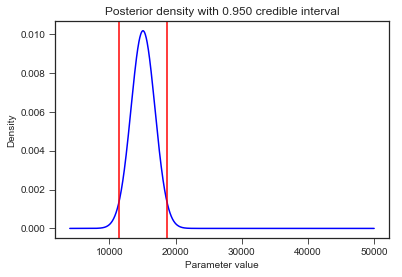

In [313]:
#credible interval for four door car
num_samples = 100000
plot_ci(p, post_fourdoor, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


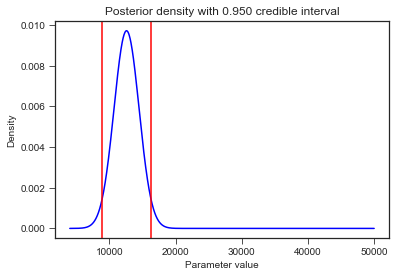

In [314]:
#credible interval for two door car
num_samples = 100000
plot_ci(p, post_twodoor, num_samples, lower_q=.025, upper_q=.975)

Bayesian model also confirms that there is no differnce in the mean of the price of two door and four door car.

###################################################################################################################

# 2. "num-of-cylinders" attribute - hypothesis testing (classical, bootstrap and bayesian model

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
(201,)


(0.0, 50000.0)

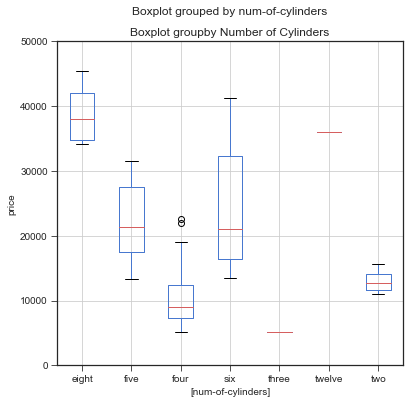

In [315]:
# checking unique values and distribution for the number of cylinder attribute
print(auto_price.loc[:, 'num-of-cylinders'].value_counts())
print(auto_price.loc[:, 'num-of-cylinders'].shape)
fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
auto_price.loc[:,['price', 'num-of-cylinders']].boxplot(by = 'num-of-cylinders', ax = ax)
ax.set_title('Boxplot groupby Number of Cylinders') # Give the plot a main title
ax.set_ylabel('price')# Set  text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis

There are seven categories in this attribute(four cylinder, six, five, eight, two, three and twelve cylinder car). However, If we see the value count for the eight, two, three and twelve cylinder car, there are only 4, 4, 1 and 1 values respectively.I am dropping these categories because they are making only about 2% (4 values out of 201 values), 2%, 0.5% and 0.5 % respectively of the data which is not enough to make any prediction and it may give wrong conclusions.

In [316]:
# data for four, six and five cylinders car in respect to their price
four_cylinder = auto_price.loc[auto_price.loc[:, 'num-of-cylinders'] == 'four', 'price']
six_cylinder = auto_price.loc[auto_price.loc[:, 'num-of-cylinders'] == 'six', 'price']
five_cylinder = auto_price.loc[auto_price.loc[:, 'num-of-cylinders'] == 'five', 'price']

### Classical Testing (ANOVA and Tukey-HSD)

In [317]:
# Because we are comparing between means of multiple categories, therefore t-test will not work and ANOVA would be more appropriate.
f_statistic, p_value = ss.f_oneway(four_cylinder, six_cylinder, five_cylinder)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))


F statistic = 95.48359632410634
P-value = 2.411493326212584e-29


F value is very high and p value is very small. Therefore, there is statistically significant difference between the  means of the price of four, five and six cylinders cars. 

In [318]:
##tukey HSD test to check differnece in means within categories
dat = {'four_price': four_cylinder}
df1 = pd.DataFrame(data = dat)
dat = {'five_price': five_cylinder}
df2 = pd.DataFrame(data = dat)
dat = {'six_price': six_cylinder}
df3 = pd.DataFrame(data = dat)

print(df1.shape)
print(df2.shape)
print(df3.shape)

(157, 1)
(10, 1)
(24, 1)


         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
    group1        group2      meandiff    lower      upper    reject
--------------------------------------------------------------------
five_cylinder four_cylinder -11704.4025 -15508.847 -7899.9581  True 
five_cylinder  six_cylinder  1664.2333  -2726.2939 6054.7605  False 
four_cylinder  six_cylinder  13368.6359 10812.013  15925.2588  True 
--------------------------------------------------------------------


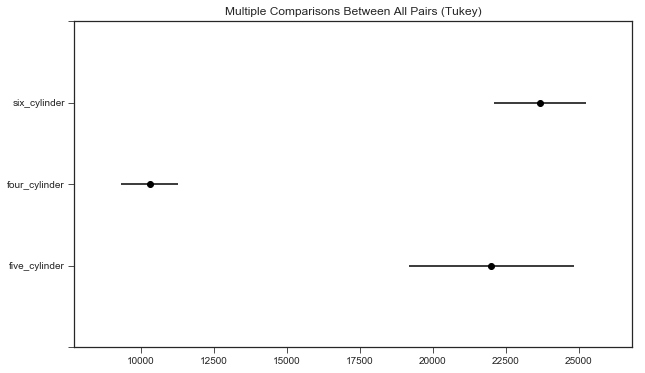

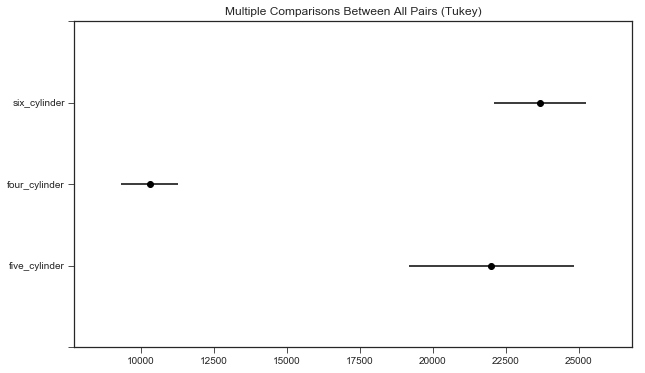

In [319]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': np.array(df1.iloc[:,0]).tolist() + np.array(df2.iloc[:,0]).tolist() + np.array(df3.iloc[:,0]).tolist(), 
                   'group_num': ['four_cylinder'] * 157 + ['five_cylinder'] * 10 + ['six_cylinder'] * 24 })
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous()

### Bootstrap

differnce in mean is 11711.81
lower confidence intervel is 7856.00 
upper confidence intervel is  15613.84


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

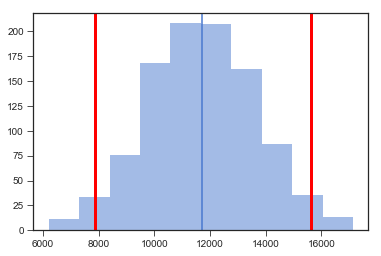

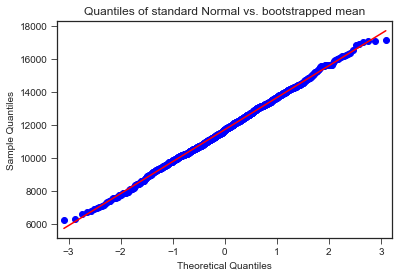

In [320]:
four_cyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'four']
five_cyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'five']
six_cyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'six']

n_replicas = 1000
diffs = []
for i in range(n_replicas):
    four_sample_mean = four_cyl.sample(frac=1, replace=True).price.mean()
    five_sample_mean = five_cyl.sample(frac=1, replace=True).price.mean()
    diffs.append(five_sample_mean - four_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 13352.86
lower confidence intervel is 9814.91 
upper confidence intervel is  17023.85


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

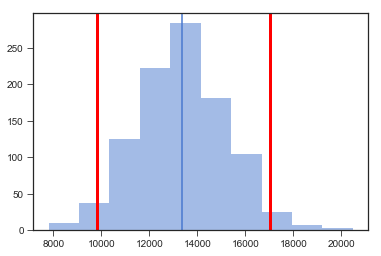

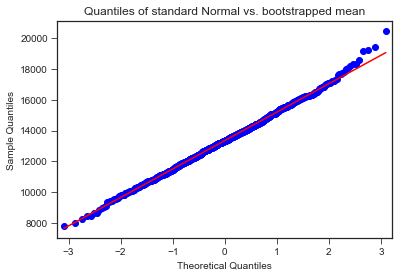

In [321]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    four_sample_mean = four_cyl.sample(frac=1, replace=True).price.mean()
    six_sample_mean = six_cyl.sample(frac=1, replace=True).price.mean()
    diffs.append(six_sample_mean - four_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')


differnce in mean is 1573.39
lower confidence intervel is -3410.44 
upper confidence intervel is  6638.15


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

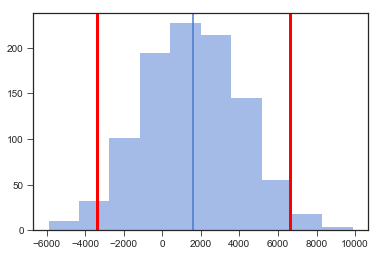

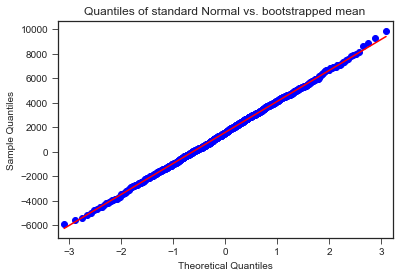

In [322]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    six_sample_mean = six_cyl.sample(frac=1, replace=True).price.mean()
    five_sample_mean = five_cyl.sample(frac=1, replace=True).price.mean()
    diffs.append(six_sample_mean - five_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')


Also, from bootstrap, it can be concluded that,three is difference in means of four and five, four and six cylinders cars and there is no significant differenc between the means of five and six cylinders cars. qqplot confirms the CLT.

### Bayesian modle for 'num-of-cylinders'

In [323]:
auto_price.loc[:, 'num-of-cylinders'].value_counts()

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [324]:
num_samples = 50
fourcyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'four'].sample(n=num_sample)

In [325]:
num_samples = 20
sixcyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'six'].sample(n=num_samples)

In [326]:
num_sample = 10
fivecyl = auto_price[auto_price.loc[:, 'num-of-cylinders'] == 'five'].sample(n=num_sample)

Mean = 11044.100, Standard deviation = 4846.687


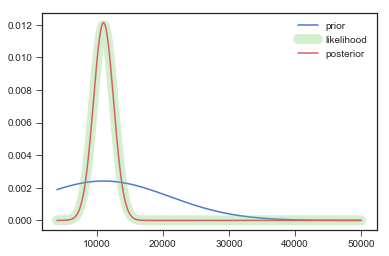

In [327]:
pp = scipy.stats.norm.pdf(p, loc=fourcyl.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_fourcyl = comp_like(p, fourcyl.price)
post_fourcyl = posterior(pp, like_fourcyl)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_fourcyl, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_fourcyl, label='posterior')
pyplot.legend()

Mean = 23741.600, Standard deviation = 9096.506


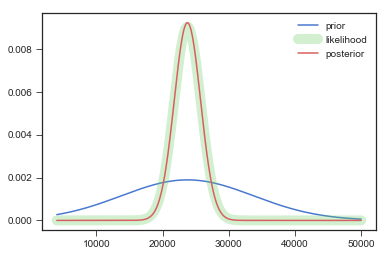

In [328]:
pp = scipy.stats.norm.pdf(p, loc=sixcyl.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_sixcyl = comp_like(p, sixcyl.price)
post_sixcyl = posterior(pp, like_sixcyl)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_sixcyl, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_sixcyl, label='posterior')
pyplot.legend()

Mean = 22007.600, Standard deviation = 5961.583


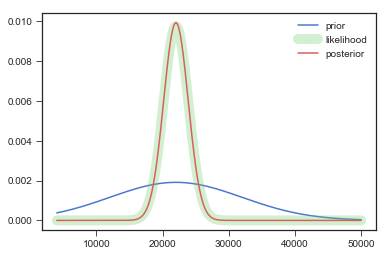

In [329]:
pp = scipy.stats.norm.pdf(p, loc=fivecyl.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_fivecyl = comp_like(p, fivecyl.price)
post_fivecyl = posterior(pp, like_fivecyl)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_fivecyl, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_fivecyl, label='posterior')
pyplot.legend()

The 0.950 credible interval is 0.025 to 0.975


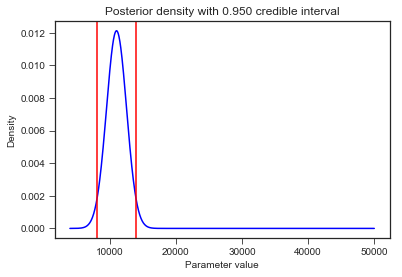

In [330]:
num_samples = 100000
plot_ci(p, post_fourcyl, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


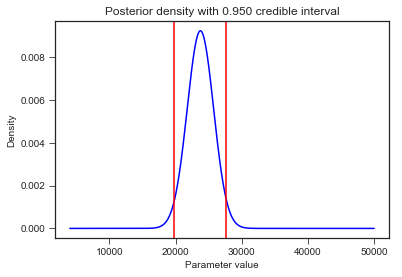

In [331]:
num_samples = 100000
plot_ci(p, post_sixcyl, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


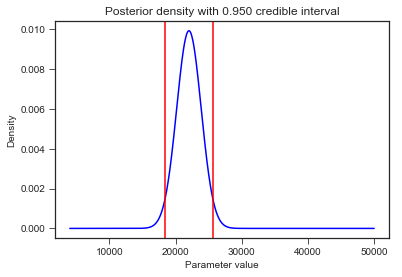

In [332]:
num_samples = 100000
plot_ci(p, post_fivecyl, num_samples, lower_q=.025, upper_q=.975)

Bayesian model also confirm the same conclusions.

######################################################################################################################

# 3. "engine-type" attribute - hypothesis testing(classical, bootstrap and bayesian model

In [333]:
auto_price.loc[:, 'engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [334]:
auto_price.loc[:, 'engine-type'].shape

(201,)

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64


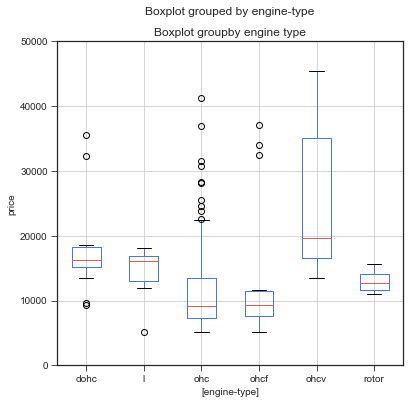

In [335]:
#checking unique values and distribution for the "engine-type" attribute

fig = plt.figure(figsize=(6, 6)) # define plot area
ax = fig.gca() # define axis 
auto_price.loc[:,['price', 'engine-type']].boxplot(by = 'engine-type', ax = ax)
ax.set_title('Boxplot groupby engine type') # Give the plot a main title
ax.set_ylabel('price')# Set  text for y axis
ax.set_ylim(0.0, 50000.0) # Set the limits of the y axis
print(auto_price.loc[:, 'engine-type'].value_counts())

'engine-type' column has six categorical values and category rotor make only about 2% of the data. Therefore, dropping this category.

In [336]:
ohc = auto_price.loc[auto_price.loc[:, 'engine-type'] == 'ohc', 'price']
ohcf = auto_price.loc[auto_price.loc[:, 'engine-type'] == 'ohcf', 'price']
ohcv = auto_price.loc[auto_price.loc[:, 'engine-type'] == 'ohcv', 'price']
l = auto_price.loc[auto_price.loc[:, 'engine-type'] == 'l', 'price']
dohc = auto_price.loc[auto_price.loc[:, 'engine-type'] == 'dohc', 'price']

## classical test

In [337]:
f_statistic, p_value = ss.f_oneway(ohc, ohcf, ohcv, l, dohc)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 12.13197859397659
P-value = 8.203358882227896e-09


p value is small so there is significant differenc between the means of categories.

In [338]:
#tukey HSD test to see difference in means within categories
dat = {'ohc_eng': ohc}
ohc_df = pd.DataFrame(data = dat)
dat = {'ohcf_eng': ohcf}
ohcf_df = pd.DataFrame(data = dat)
dat = {'ohcv_eng': ohcv}
ohcv_df = pd.DataFrame(data = dat)
dat = {'l_eng': l}
l_df = pd.DataFrame(data = dat)
dat = {'dohc_eng': dohc}
dohc_df = pd.DataFrame(data = dat)

print(ohc_df.shape)
print(ohcf_df.shape)
print(ohcv_df.shape)
print(l_df.shape)
print(dohc_df.shape)

(145, 1)
(15, 1)
(13, 1)
(12, 1)
(12, 1)


  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2  meandiff     lower      upper    reject
------------------------------------------------------
 dohc    l    -3488.8333 -11631.9766  4654.31   False 
 dohc   ohc   -6549.058  -12540.6593 -557.4568   True 
 dohc   ohcf  -4377.8167 -12103.0807 3347.4474  False 
 dohc   ohcv  6981.9679   -1003.041  14966.9769 False 
  l     ohc   -3060.2247  -9051.826  2931.3766  False 
  l     ohcf  -888.9833   -8614.2474 6836.2807  False 
  l     ohcv  10470.8013  2485.7923  18455.8103  True 
 ohc    ohcf  2171.2414   -3238.7686 7581.2513  False 
 ohc    ohcv  13531.026   7756.1778  19305.8742  True 
 ohcf   ohcv  11359.7846  3801.3926  18918.1766  True 
------------------------------------------------------


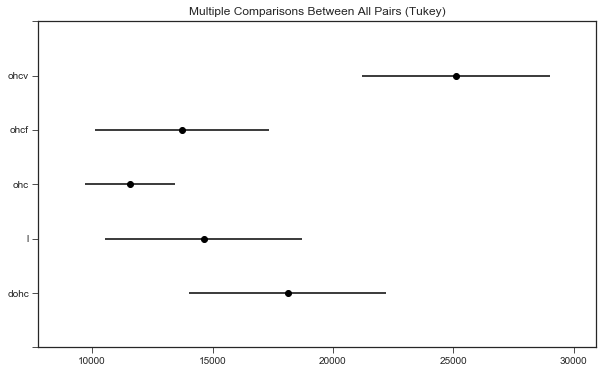

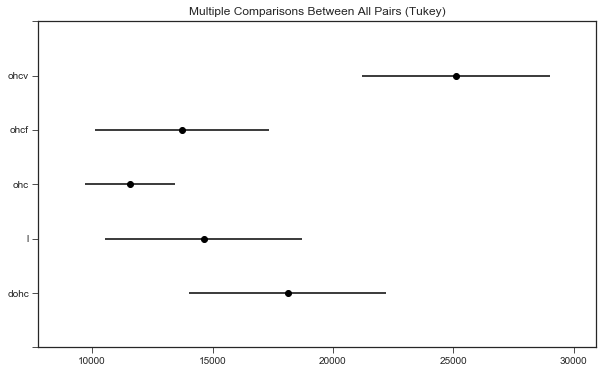

In [339]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
df = pd.DataFrame({'vals': np.array(ohc_df.iloc[:,0]).tolist() + np.array(ohcf_df.iloc[:,0]).tolist() + np.array(ohcv_df.iloc[:,0]).tolist() +  np.array(l_df.iloc[:,0]).tolist() + np.array(dohc_df.iloc[:,0]).tolist(),
                   'group_num': ['ohc'] * 145 + ['ohcf'] * 15 + ['ohcv'] * 13 + ['l'] *12 + ['dohc']* 12 })
Tukey_HSD = pairwise_tukeyhsd(df.vals, df.group_num)
print(Tukey_HSD)

Tukey_HSD.plot_simultaneous()

Except the differenc of the means in the price of the dohc - ohc engine- type cars, l - ohcv, ohc - ohcv, and ohcf - ohcv engine type cars are significant differnt. All others engine type doesn't show any statistically significant differnce in the price of car. 

## Bootstrap

In [340]:
ohc = auto_price[auto_price.loc[:, 'engine-type'] == 'ohc']
ohcf = auto_price[auto_price.loc[:, 'engine-type'] == 'ohcf']
ohcv = auto_price[auto_price.loc[:, 'engine-type'] == 'ohcv']
l = auto_price[auto_price.loc[:, 'engine-type'] == 'l']
dohc = auto_price[auto_price.loc[:, 'engine-type'] == 'dohc']

differnce in mean is -2105.69
lower confidence intervel is -7743.41 
upper confidence intervel is  3116.85


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

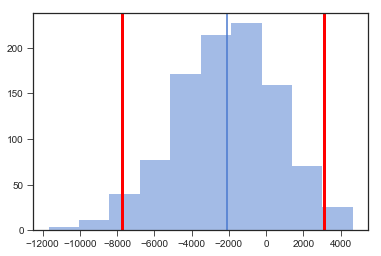

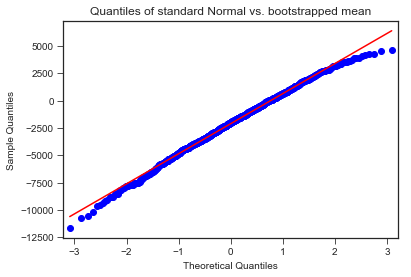

In [341]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohc_sample_mean = ohc.sample(frac=1, replace=True).price.mean()
    ohcf_sample_mean = ohcf.sample(frac=1, replace=True).price.mean()
    diffs.append(ohc_sample_mean - ohcf_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 13492.06
lower confidence intervel is 7906.52 
upper confidence intervel is  19598.76


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

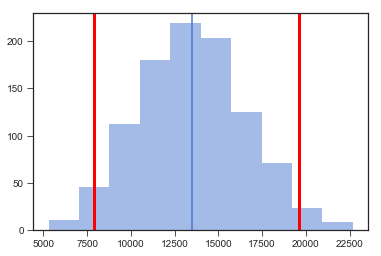

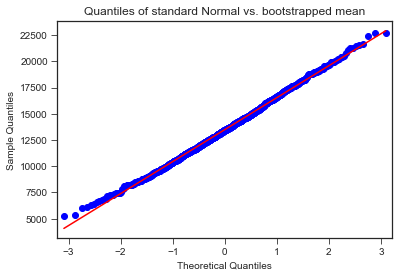

In [342]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohc_sample_mean = ohc.sample(frac=1, replace=True).price.mean()
    ohcv_sample_mean = ohcv.sample(frac=1, replace=True).price.mean()
    diffs.append(ohcv_sample_mean - ohc_sample_mean)
diffs = pd.Series(diffs)

plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 3061.79
lower confidence intervel is 667.20 
upper confidence intervel is  5073.35


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

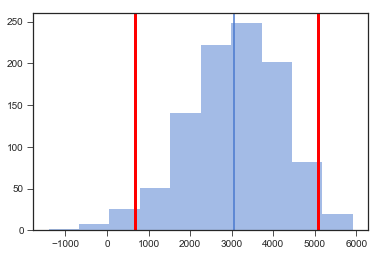

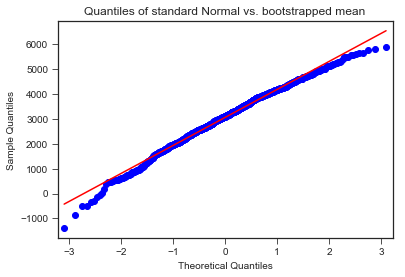

In [343]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohc_sample_mean = ohc.sample(frac=1, replace=True).price.mean()
    l_sample_mean = l.sample(frac=1, replace=True).price.mean()
    diffs.append(l_sample_mean - ohc_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 6564.61
lower confidence intervel is 2509.50 
upper confidence intervel is  11470.84


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

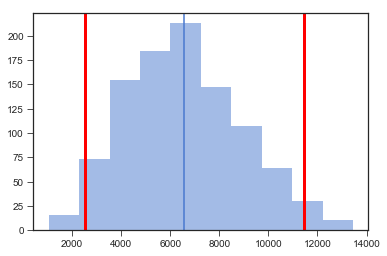

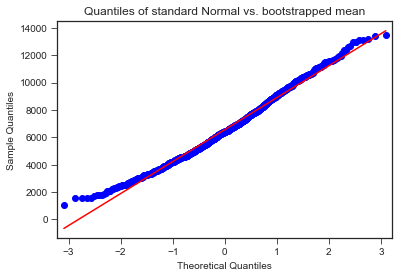

In [344]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohc_sample_mean = ohc.sample(frac=1, replace=True).price.mean()
    dohc_sample_mean = dohc.sample(frac=1, replace=True).price.mean()
    diffs.append(dohc_sample_mean - ohc_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is -11628.10
lower confidence intervel is -19912.08 
upper confidence intervel is -3610.36


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

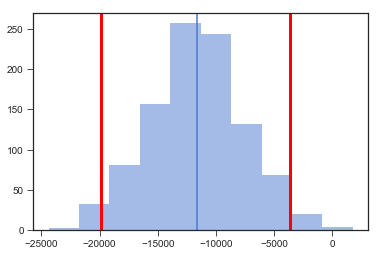

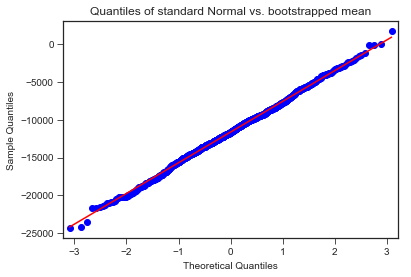

In [345]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohcf_sample_mean = ohcf.sample(frac=1, replace=True).price.mean()
    ohcv_sample_mean = ohcv.sample(frac=1, replace=True).price.mean()
    diffs.append(ohcf_sample_mean - ohcv_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is -975.76
lower confidence intervel is -6213.04 
upper confidence intervel is  4995.73


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

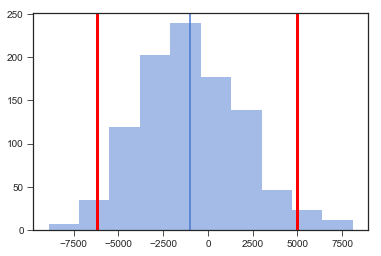

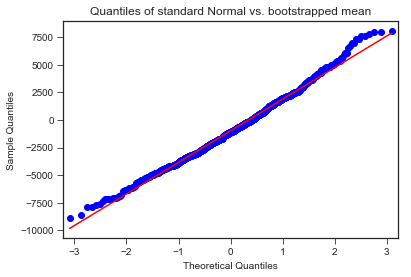

In [346]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohcf_sample_mean = ohcf.sample(frac=1, replace=True).price.mean()
    l_sample_mean = l.sample(frac=1, replace=True).price.mean()
    diffs.append(ohcf_sample_mean - l_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 4214.13
lower confidence intervel is -2657.43 
upper confidence intervel is  10668.68


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

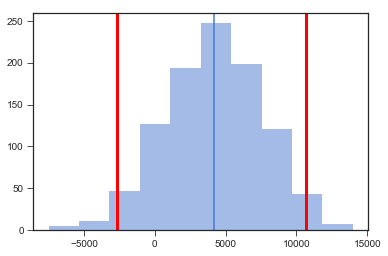

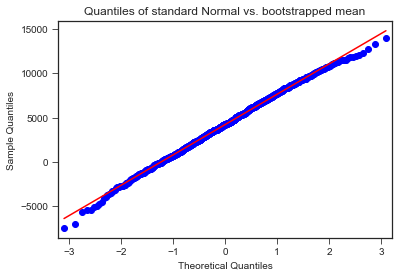

In [347]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohcf_sample_mean = ohcf.sample(frac=1, replace=True).price.mean()
    dohc_sample_mean = dohc.sample(frac=1, replace=True).price.mean()
    diffs.append(dohc_sample_mean - ohcf_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 10456.28
lower confidence intervel is 4492.56 
upper confidence intervel is  16631.16


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

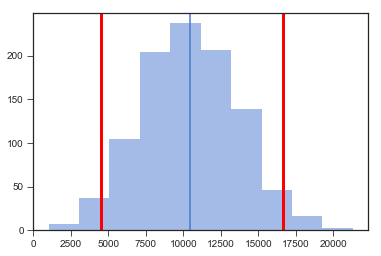

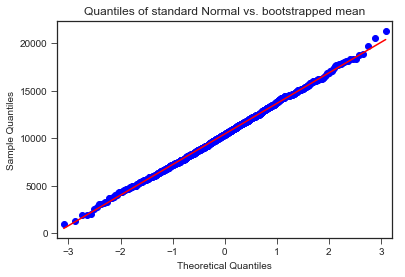

In [348]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohcv_sample_mean = ohcv.sample(frac=1, replace=True).price.mean()
    l_sample_mean = l.sample(frac=1, replace=True).price.mean()
    diffs.append(ohcv_sample_mean - l_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 7972.33
lower confidence intervel is 4055.31 
upper confidence intervel is  12468.51


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

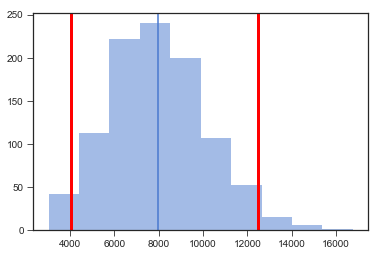

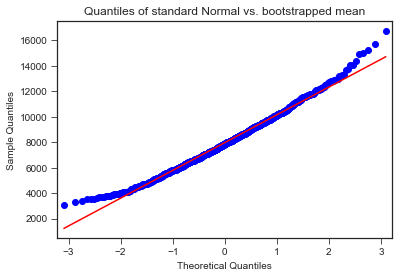

In [349]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    ohcv_sample_mean = ohcv.sample(frac=1, replace=True).price.mean()
    dohc_sample_mean = dohc.sample(frac=1, replace=True).price.mean()
    diffs.append(dohc_sample_mean - ohcf_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

differnce in mean is 3553.48
lower confidence intervel is -827.93 
upper confidence intervel is  8754.41


Text(0.5,1,'Quantiles of standard Normal vs. bootstrapped mean')

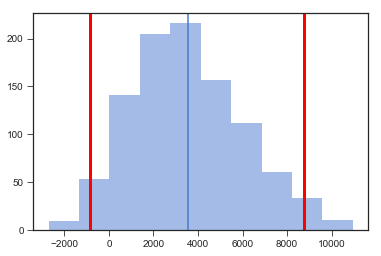

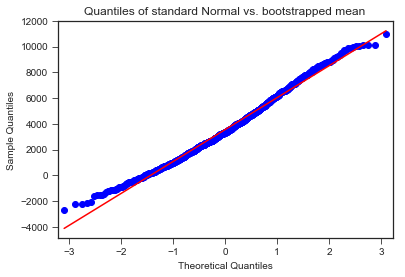

In [350]:
n_replicas = 1000
diffs = []
for i in range(n_replicas):
    l_sample_mean = l.sample(frac=1, replace=True).price.mean()
    dohc_sample_mean = dohc.sample(frac=1, replace=True).price.mean()
    diffs.append(dohc_sample_mean - l_sample_mean)
diffs = pd.Series(diffs)
plot_hist(diffs)
import statsmodels.api as sm
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

form the bootstrap method, it can be concluded that there is significant differnce in the price of ohc-ohcv, ohc-l,ohc-dohc,ohcf-ohcv, and ohcv-l engine-type category. However, from the tukey-HSD there was no differenc in ohc-l engine-type categoory.


### Bayesian Model 

In [351]:
auto_price.loc[:, 'engine-type'].value_counts()

ohc      145
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
Name: engine-type, dtype: int64

In [352]:
num_samples = 50
ohc_eng = auto_price[auto_price.loc[:, 'engine-type'] == 'ohc'].sample(n=num_samples)

In [353]:
num_samples = 15
ohcf_eng = auto_price[auto_price.loc[:, 'engine-type'] == 'ohcf'].sample(n=num_samples)

In [354]:
num_samples = 10
ohcv_eng = auto_price[auto_price.loc[:, 'engine-type'] == 'ohcv'].sample(n=num_samples)
l_eng = auto_price[auto_price.loc[:, 'engine-type'] == 'l'].sample(n=num_samples)
dohc_eng = auto_price[auto_price.loc[:, 'engine-type'] == 'dohc'].sample(n=num_samples)

Mean = 11334.180, Standard deviation = 5710.451


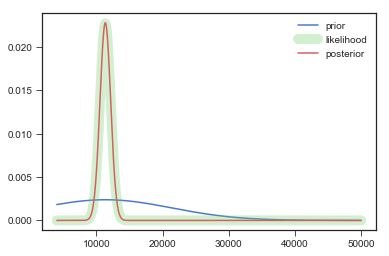

In [355]:
pp = scipy.stats.norm.pdf(p, loc=ohc_eng.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_ohc_eng = comp_like(p, ohc_eng.price)
post_ohc_eng = posterior(pp, like_ohc_eng)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_ohc_eng, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_ohc_eng, label='posterior')
pyplot.legend()

Mean = 13738.600, Standard deviation = 10559.844


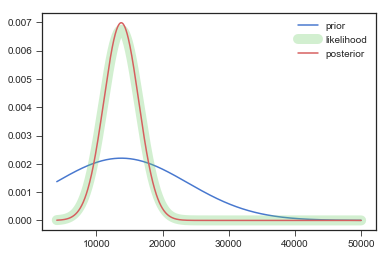

In [356]:
pp = scipy.stats.norm.pdf(p, loc=ohcf_eng.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_ohcf_eng = comp_like(p, ohcf_eng.price)
post_ohcf_eng = posterior(pp, like_ohcf_eng)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_ohcf_eng, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_ohcf_eng, label='posterior')
pyplot.legend()

Mean = 25748.100, Standard deviation = 11352.804


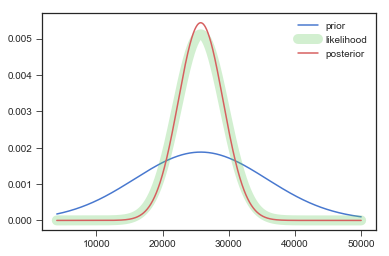

In [357]:
pp = scipy.stats.norm.pdf(p, loc=ohcv_eng.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_ohcv_eng = comp_like(p, ohcv_eng.price)
post_ohcv_eng = posterior(pp, like_ohcv_eng)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_ohcv_eng, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_ohcv_eng, label='posterior')
pyplot.legend()

Mean = 15043.100, Standard deviation = 3704.651


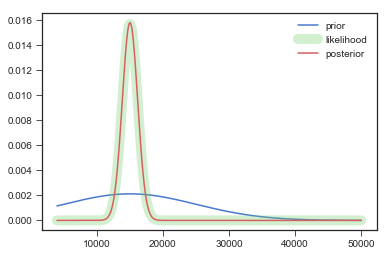

In [358]:
pp = scipy.stats.norm.pdf(p, loc=l_eng.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_l_eng = comp_like(p, l_eng.price)
post_l_eng = posterior(pp, like_l_eng)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_l_eng, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_l_eng, label='posterior')
pyplot.legend()

Mean = 18520.700, Standard deviation = 8291.778


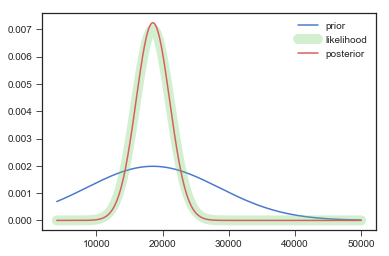

In [359]:
pp = scipy.stats.norm.pdf(p, loc=dohc_eng.price.mean(), scale=10000)
pp = pp / pp.sum() # normalize

like_dohc_eng = comp_like(p, dohc_eng.price)
post_dohc_eng = posterior(pp, like_dohc_eng)

pyplot.plot(p, pp, label='prior')
pyplot.plot(p, like_dohc_eng, label='likelihood', alpha=.3, linewidth=10)
pyplot.plot(p, post_dohc_eng, label='posterior')
pyplot.legend()

The 0.950 credible interval is 0.025 to 0.975


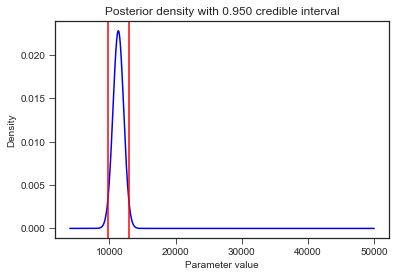

In [360]:
num_samples = 100000
plot_ci(p, post_ohc_eng, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


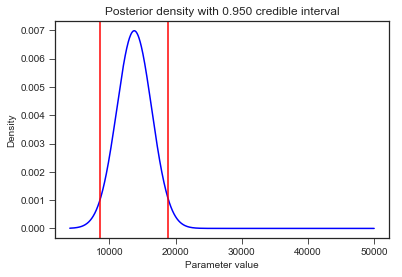

In [361]:
num_samples = 100000
plot_ci(p, post_ohcf_eng, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


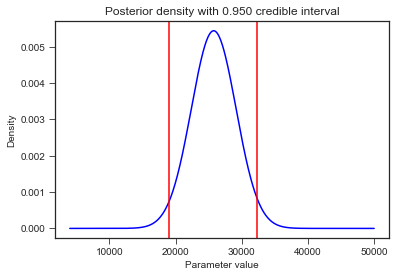

In [362]:
num_samples = 100000
plot_ci(p, post_ohcv_eng, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


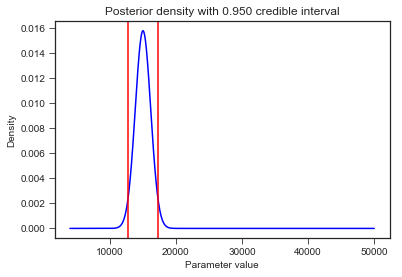

In [363]:
num_samples = 100000
plot_ci(p, post_l_eng, num_samples, lower_q=.025, upper_q=.975)

The 0.950 credible interval is 0.025 to 0.975


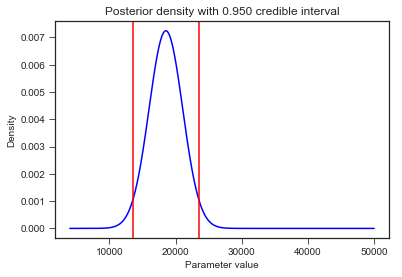

In [364]:
num_samples = 100000
plot_ci(p, post_dohc_eng, num_samples, lower_q=.025, upper_q=.975)

## Conclusions

- In this document, 3 attributes of auto data has been analysed and performed hypothesis testing by t-test, Anova, tukey-hsd, bootstrap and bayesian model. Number of doors (two door vs four door cars) didn't show any significant differnce. Number of cylinders has significant diifernce in the price of car and engine-type also contibute in the dffernce in the price of cars.  